# RQ3 - Insertions and Removals

Uses:

- resources/seq_pattern/countpatterns_OutX_notOutx_Xlastslice.csv (from prepare/historical_seqpatterns_format.ipynb **manual**)
- Variable rq2_projects_with_dbms_history_total (from rq2/distribution.ipynb)

Generates:

- insertionsandremovals.pdf (fig:keptandremoved)

Variables:

- rq3_mysql_removal
- rq3_mysql_2nd_ins
- rq3_mysql_2nd_rem
- rq3_mysql
- rq3_mysql_once
- rq3_mysql_never_removed
- rq3_no_removals




In [1]:
import sys  
sys.path.insert(1, '..')

In [2]:
import os
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from util import SEQ_PATTERNS_DIR, IMAGES_DIR
from analysis_helpers import var, relative_var, load_vars

In [3]:
size_corpus = int(load_vars()['rq2_projects_with_dbms_history_total'])

In [4]:
df4t = pd.read_csv(SEQ_PATTERNS_DIR + os.sep + "countpatterns_OutX_notOutx_Xlastslice.csv")
df4t

,Name,Support,Line Count,Bindings,Source
0,InX,1.000000,233,NaN,InX -v X
1,InH2,0.489270,114,X = H2,InX -v X
2,InOracle,0.403433,94,X = Oracle,InX -v X
3,InHazelcast,0.145923,34,X = Hazelcast,InX -v X
4,InHyperSQL,0.347639,81,X = HyperSQL,InX -v X
...,...,...,...,...,...
266,$SapHana,0.038627,9,X = SapHana,$X -v X
267,$Aerospike,0.004292,1,X = Aerospike,$X -v X
268,$Impala,0.004292,1,X = Impala,$X -v X
269,$Join_Ignite_Sql,0.008584,2,X = Join_Ignite_Sql,$X -v X


In [5]:
df4t["Source"].unique()

array(['InX -v X', 'InX -> OutX -v X', 'InX -> OutX -> InX -v X',
       'InX -> OutX -> InX -> OutX -v X',
       'InX -> OutX -> InX -> OutX -> InX -v X',
       'InX -> OutX -> InX -> OutX -> InX -> OutX -v X',
       'InX -> OutX -> InX -> OutX -> InX -> OutX -> InX -v X',
       'OutX -v X', 'X ~OutX -v X', '$X -v X'], dtype=object)

In [6]:
assert len(df4t[df4t["Source"] == 'InX -> OutX -> InX -> OutX -> InX -> OutX -> InX" -v X + "InX -> OutX -> InX -> OutX -> InX -> OutX -> InX -> OutX -v X']) == 0, "Should be 0. Otherwise, we need to look for more patterns"
assert len(df4t[df4t["Source"] == 'InX -> OutX -> InX -> OutX -> InX -> OutX -> InX" -v X + "InX -> OutX -> InX -> OutX -> InX -> OutX -> InX -> OutX -v X']) == 0, "Paper: 'No projects in our corpus had more than 4 insertions or more than 3 removals.'"


Identify databases from patterncounter bindings

In [7]:
df4 = df4t[~df4t["Bindings"].isnull()].copy()
df4.loc[:,"Databases"] = df4["Bindings"].str.replace("X = ", "")
df4['Databases'].replace({'Join_Ignite': 'Ignite'}, regex=True, inplace=True)
df4['Databases'].replace({'GoogleCloudFilestore': 'GoogleCloudFirestore'}, regex=True, inplace=True)
df4

,Name,Support,Line Count,Bindings,Source,Databases
1,InH2,0.489270,114,X = H2,InX -v X,H2
2,InOracle,0.403433,94,X = Oracle,InX -v X,Oracle
3,InHazelcast,0.145923,34,X = Hazelcast,InX -v X,Hazelcast
4,InHyperSQL,0.347639,81,X = HyperSQL,InX -v X,HyperSQL
5,InPostgreSQL,0.437768,102,X = PostgreSQL,InX -v X,PostgreSQL
...,...,...,...,...,...,...
266,$SapHana,0.038627,9,X = SapHana,$X -v X,SapHana
267,$Aerospike,0.004292,1,X = Aerospike,$X -v X,Aerospike
268,$Impala,0.004292,1,X = Impala,$X -v X,Impala
269,$Join_Ignite_Sql,0.008584,2,X = Join_Ignite_Sql,$X -v X,Ignite_Sql


Rename values to meaningful ones

In [8]:
df4['Source'].replace({'InX -v X':'insertion:1'}, inplace=True)
df4['Source'].replace({'InX -> OutX -v X':'removal:1'}, inplace=True)
df4['Source'].replace({'InX -> OutX -> InX -v X':'insertion:2'}, inplace=True)
df4['Source'].replace({'InX -> OutX -> InX -> OutX -v X':'removal:2'}, inplace=True)
df4['Source'].replace({'InX -> OutX -> InX -> OutX -> InX -v X':'insertion:3'}, inplace=True)
df4['Source'].replace({'InX -> OutX -> InX -> OutX -> InX -> OutX -v X':'removal:3'}, inplace=True)
df4['Source'].replace({'InX -> OutX -> InX -> OutX -> InX -> OutX -> InX -v X':'insertion:4'}, inplace=True)
df4['Source'].replace({'OutX -v X':'Removed'}, inplace=True)
df4['Source'].replace({'X ~OutX -v X':'Never-removed'}, inplace=True)
df4['Source'].replace({'$X -v X':'Last'}, inplace=True)
df4.rename(columns={'Line Count': 'Lines'}, inplace=True)

df4

,Name,Support,Lines,Bindings,Source,Databases
1,InH2,0.489270,114,X = H2,insertion:1,H2
2,InOracle,0.403433,94,X = Oracle,insertion:1,Oracle
3,InHazelcast,0.145923,34,X = Hazelcast,insertion:1,Hazelcast
4,InHyperSQL,0.347639,81,X = HyperSQL,insertion:1,HyperSQL
5,InPostgreSQL,0.437768,102,X = PostgreSQL,insertion:1,PostgreSQL
...,...,...,...,...,...,...
266,$SapHana,0.038627,9,X = SapHana,Last,SapHana
267,$Aerospike,0.004292,1,X = Aerospike,Last,Aerospike
268,$Impala,0.004292,1,X = Impala,Last,Impala
269,$Join_Ignite_Sql,0.008584,2,X = Join_Ignite_Sql,Last,Ignite_Sql


## Removed and Never Removed

In [9]:
df5 = df4[
    (df4['Source'] == 'Removed')
    | (df4['Source'] == 'Never-removed')
].copy()
df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)
df5 = df5.sort_values(['Amount of Projects'], ascending=[False])
df5 = df5[['Databases', 'Legend', 'Amount of Projects']].copy()
df5

,Databases,Legend,Amount of Projects
185,MySQL,Never-removed,96
179,H2,Never-removed,82
183,PostgreSQL,Never-removed,77
180,Oracle,Never-removed,71
190,Redis,Never-removed,68
...,...,...,...
160,PostGIS,Removed,1
159,CouchDB,Removed,1
163,MarkLogic,Removed,1
221,Impala,Never-removed,1


### _Display Removed and Never Removed Based on All Corpus

(Not used in the paper)

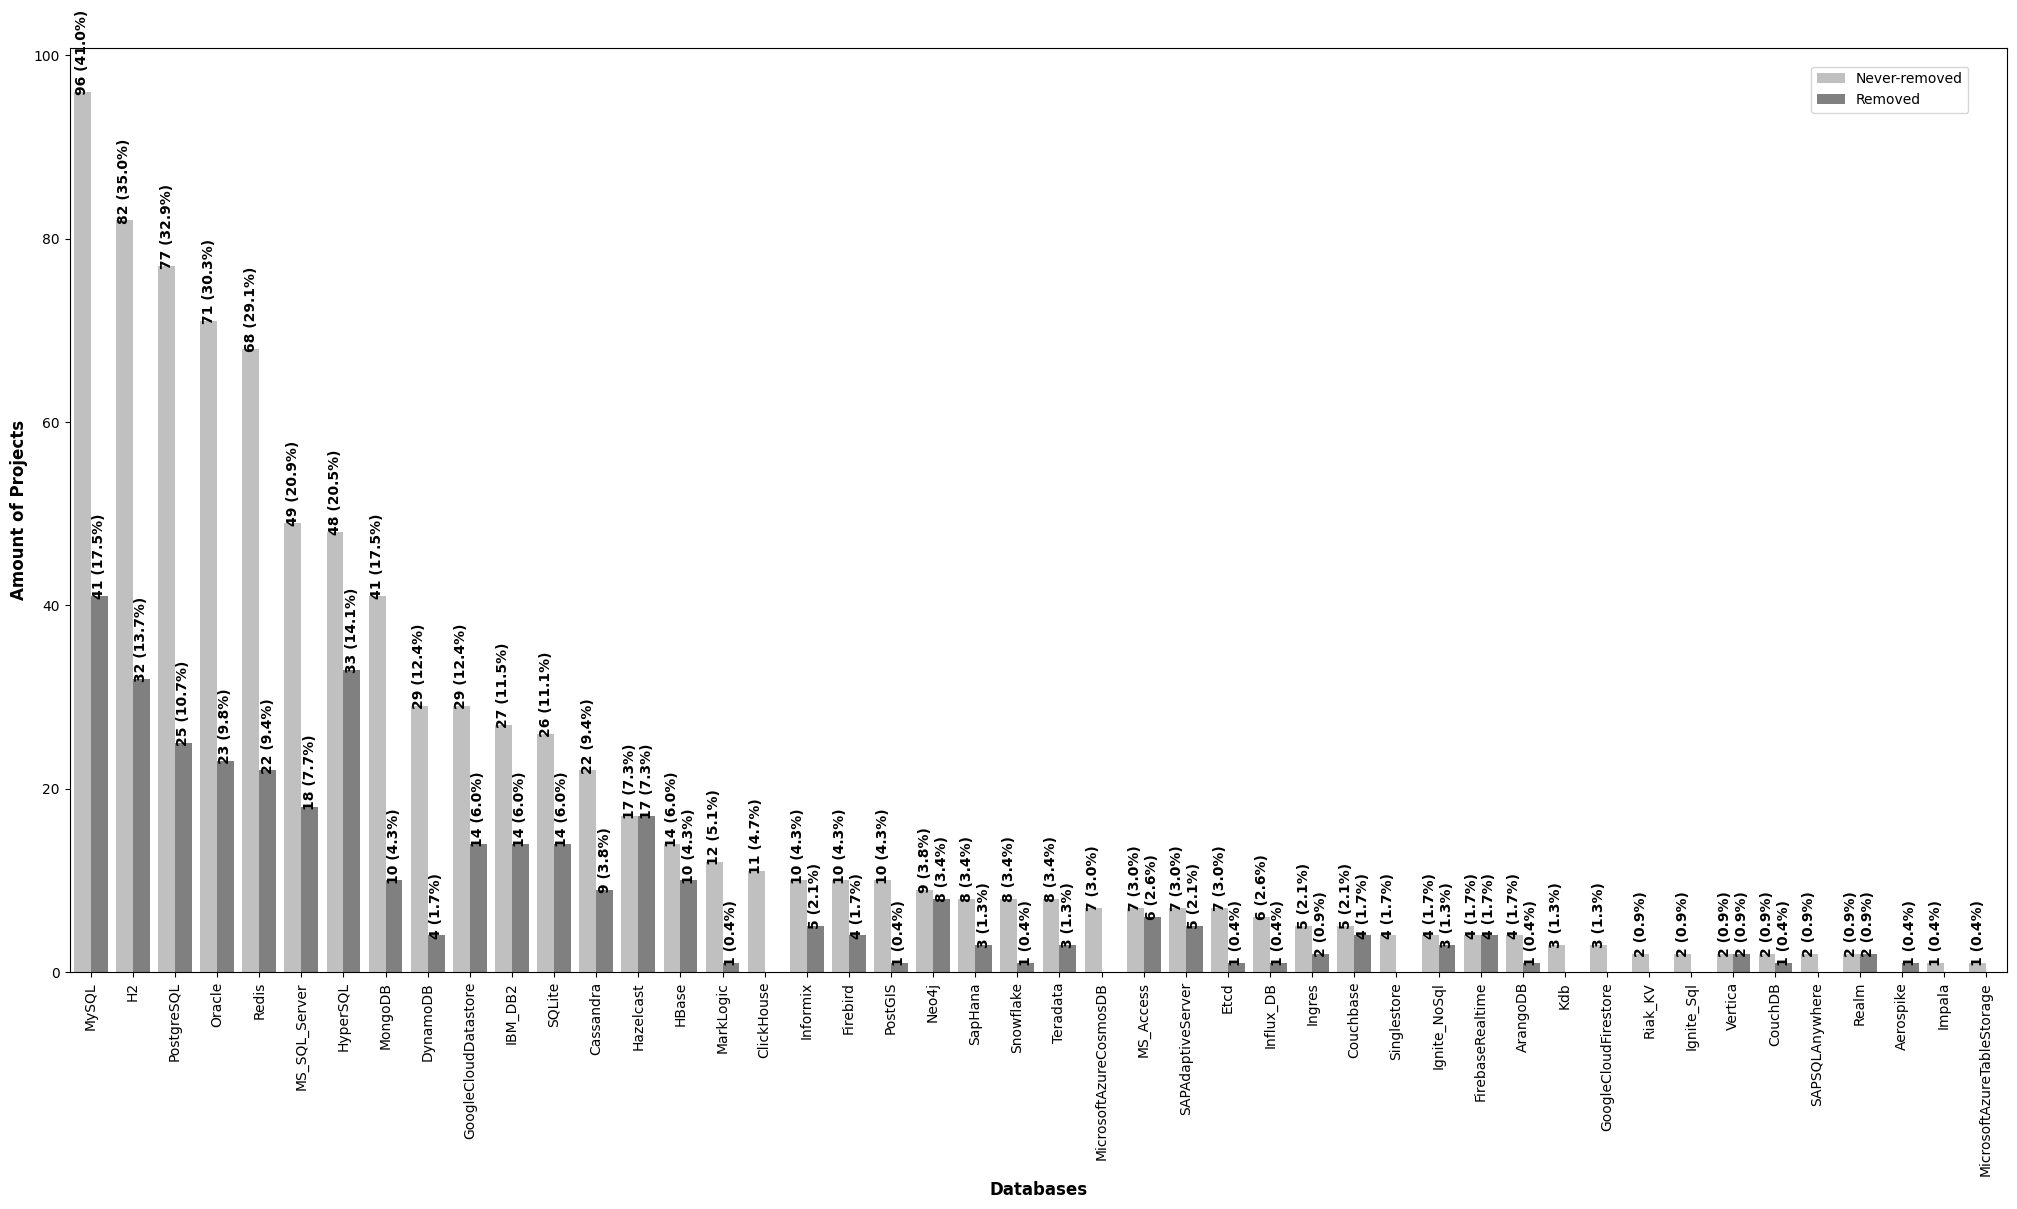

In [10]:
plt.figure(figsize=(25, 12))

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            if np.isnan(_x) or np.isnan(_y):
                continue
            height = p.get_height()
            percent = 100 * height / size_corpus
            #value = '{:.1f}'.format(percent)
            value = '{:.0f} ({:.1f}%)'.format(height, percent)
            ax.text(_x, _y, value, ha="center", fontsize = 10, fontweight='bold', rotation=90)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# create grouped bar chart
p = sns.barplot(x='Databases', y='Amount of Projects', hue='Legend', data=df5, palette=["Silver", "gray"])

# add axis titles
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# add values to bars
show_values_on_bars(p)

# add legend
plt.legend(bbox_to_anchor=(0.98, 0.98), loc='upper right', borderaxespad=0.)

# rotate x-axis labels
plt.xticks(rotation=90)
#plt.yticks(range(0, 30, 10), fontsize=12)

#plt.savefig(IMAGES_DIR+"/projects_keptandremoved3.pdf", format="pdf", bbox_inches="tight")
# show plot
plt.show()

### _Display Removed and Never Removed with Relative Percentages

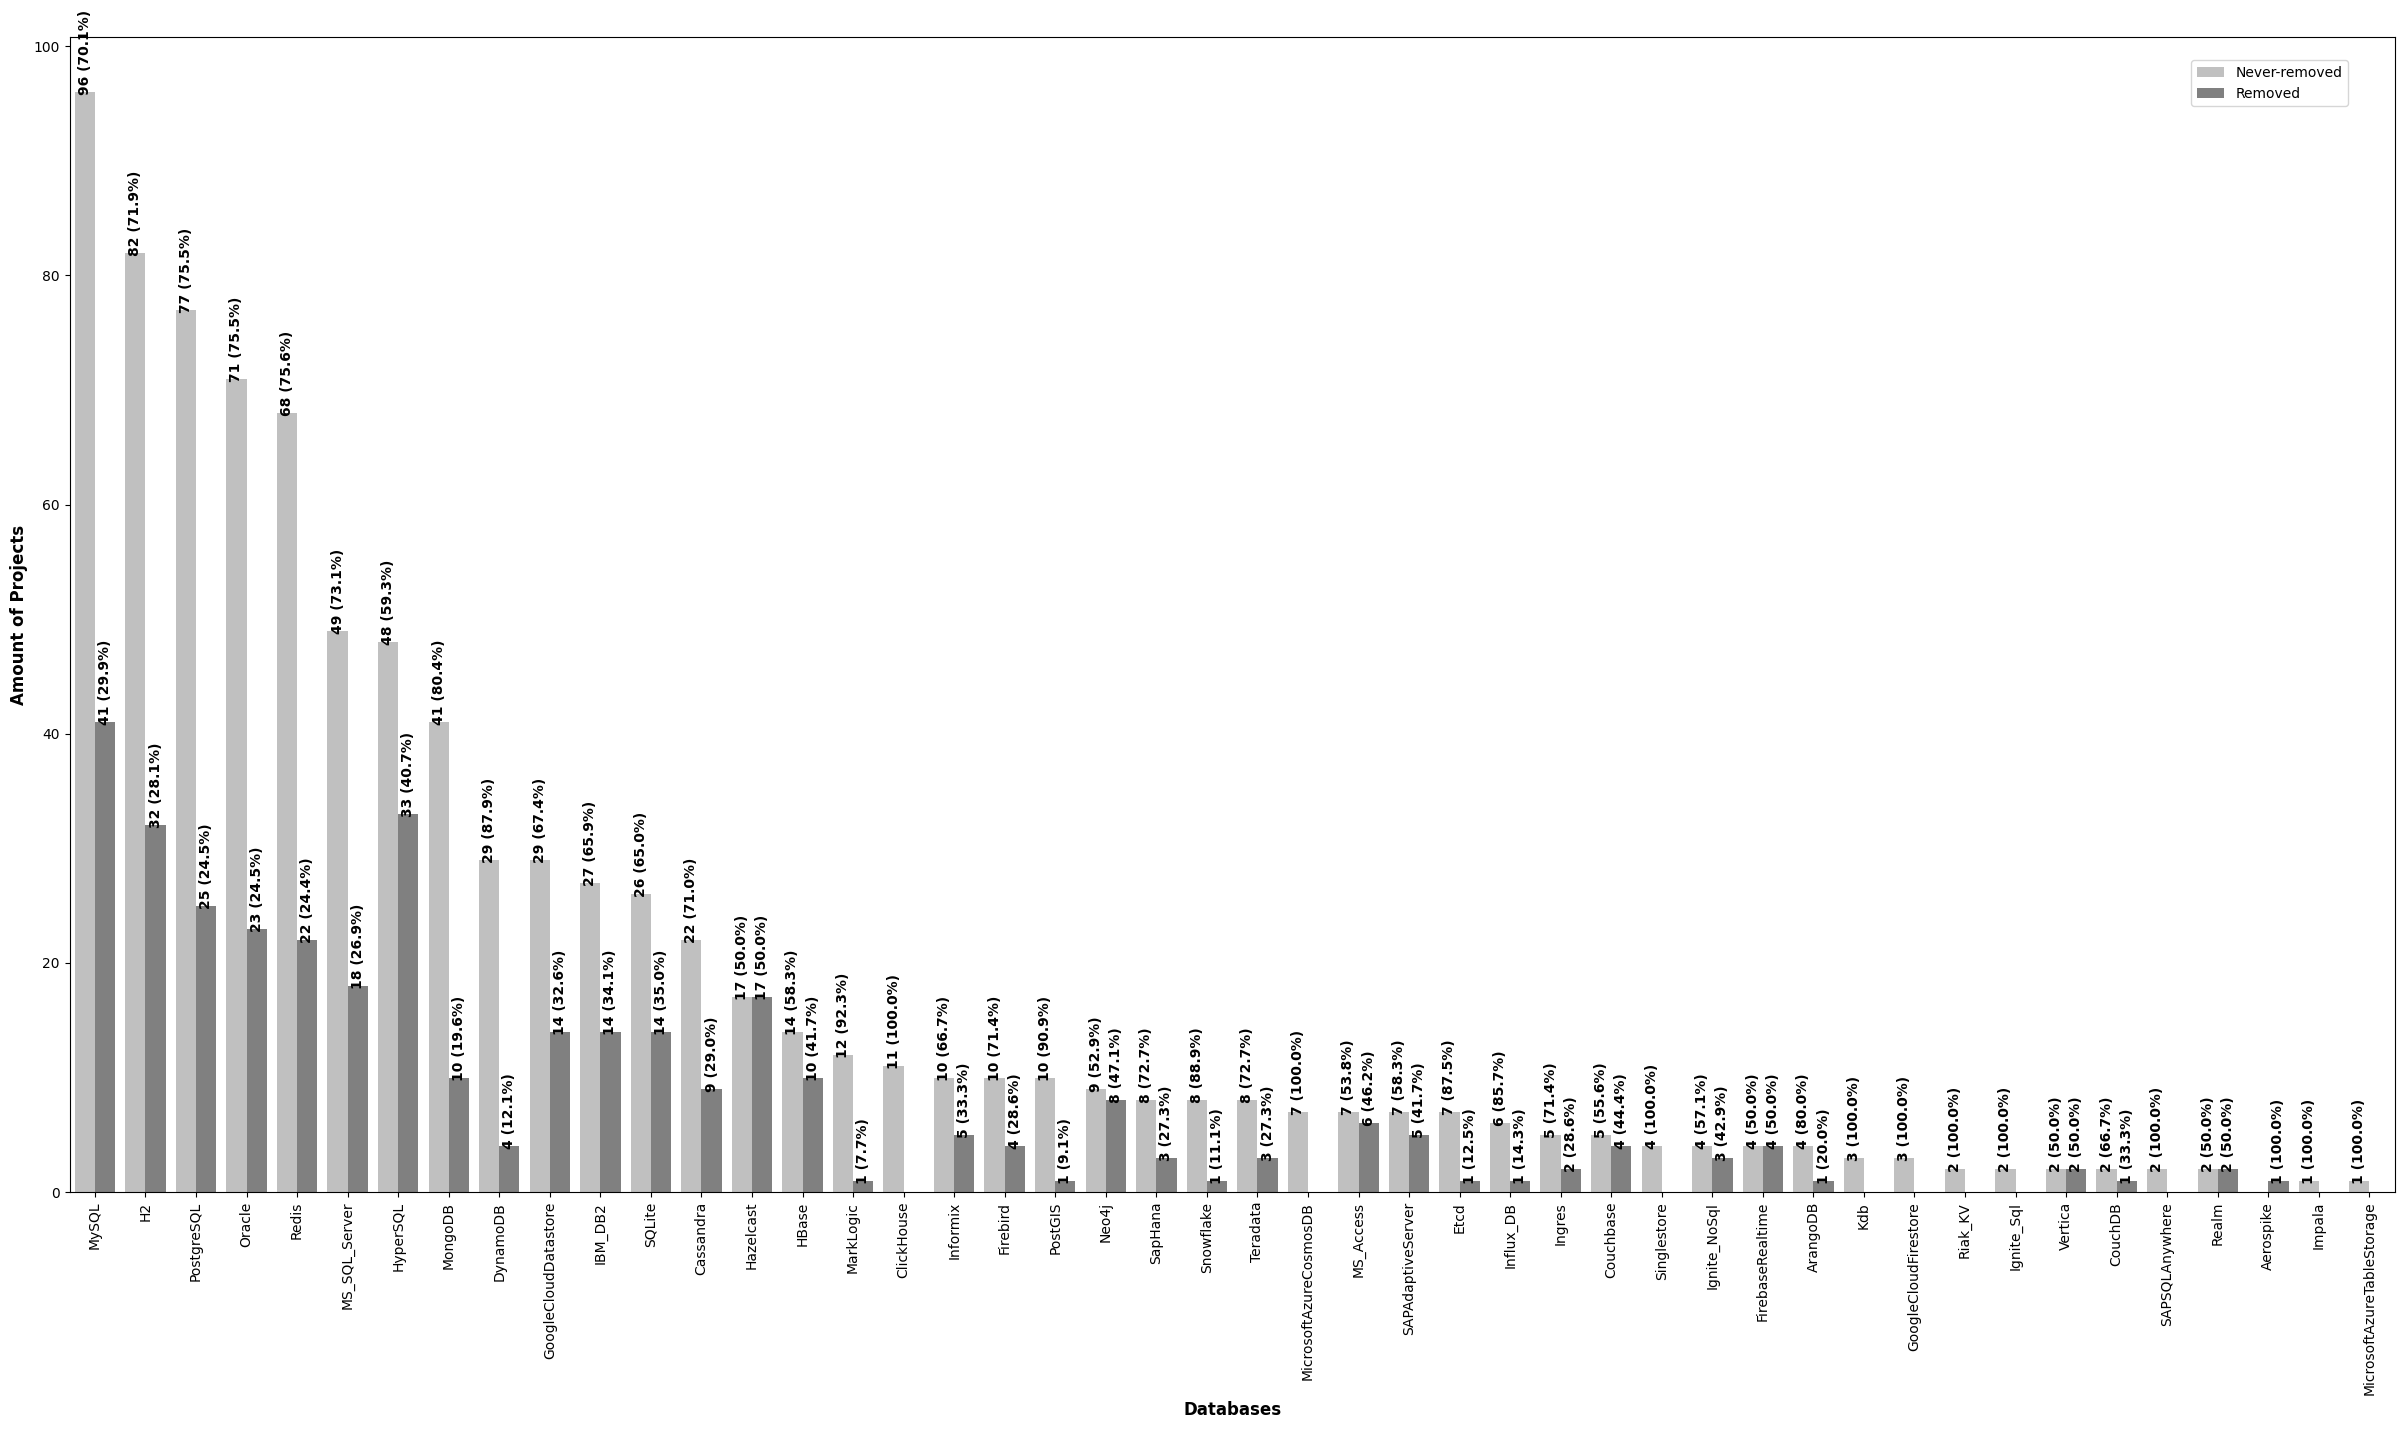

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Exemplo de DataFrame (ajuste conforme seus dados)

plt.figure(figsize=(30, 15))

def show_values_on_bars(axs, df):
    def _show_on_single_plot(ax):
        # Iterar sobre as barras
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2  # Posição no eixo X (meio da barra)
            _y = p.get_y() + p.get_height()  # Posição Y para a colocação do texto
            if np.isnan(_x) or np.isnan(_y):
                continue
            height = p.get_height()

            # Obter o nome do banco de dados (Databases) a partir do eixo X
            label = p.get_x()  # Posição no eixo X (deve ser o nome do banco de dados)
            
            # Associar a posição do eixo X com o nome do banco
            # Agora, estamos usando o valor da coluna 'Databases' para pegar o nome correto
            #xticklabels = [tick.get_text() for tick in ax.get_xticklabels()]
            #label = xticklabels[int(label)]

            # Supondo que os rótulos do eixo X correspondem a um intervalo de índices
            xticklabels = [tick.get_text() for tick in ax.get_xticklabels()]

            # Se p.get_x() não for um índice exato, podemos fazer uma busca pelo valor mais próximo
            x_pos = p.get_x()

            # Encontrar o índice mais próximo
            closest_idx = min(range(len(xticklabels)), key=lambda i: abs(x_pos - i))

            # Agora, podemos usar o índice para pegar o nome correspondente
            label = xticklabels[closest_idx]

            
            #database_name = df['Databases'].iloc[int(label)].replace(' ', '')  # Ajustar para garantir que não há espaços

            # Calcular o total para esse banco de dados (Removed + Kept)
            total_height = df[df['Databases'] == label]['Amount of Projects'].sum()

            # Verificação para evitar a divisão por zero
            if total_height == 0:
                percent = 0  # Se o total for zero, define o percentual como zero
            else:
                percent = 100 * height / total_height  # Calcula a porcentagem da barra

            # Formatar a exibição do valor: valor absoluto e percentual
            value = '{:.0f} ({:.1f}%)'.format(height, percent)
            ax.text(_x, _y, value, ha="center", fontsize=10, fontweight='bold', rotation=90)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


# Criar o gráfico de barras agrupadas
p = sns.barplot(x='Databases', y='Amount of Projects', hue='Legend', data=df5, palette=["Silver", "gray"])

# Adicionar títulos aos eixos
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# Adicionar valores às barras
show_values_on_bars(p, df5)

# Adicionar legenda
plt.legend(bbox_to_anchor=(0.98, 0.98), loc='upper right', borderaxespad=0.)

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90)

# Salvar o gráfico em PDF
#plt.savefig(IMAGES_DIR+"/projects_keptandremoved3.pdf", format="pdf", bbox_inches="tight")

# Exibir o gráfico
plt.show()


### Display Insertions and Removals

fig:keptandremoved

Create dataframe that only contains insertion and removal patterns

In [12]:
df5t = df4[
    (df4['Source'] != 'Last')
    & (df4['Source'] != 'Removed')
    & (df4['Source'] != 'Never-removed')
].copy()
df5t[['Operation', 'Count']] = df5t['Source'].str.split(':', n=1, expand=True)
df5t.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)
df5t = df5t.sort_values(['Amount of Projects'], ascending=[False])
df5t = df5t[['Databases', 'Operation', 'Count', 'Amount of Projects']].copy()
df5t

,Databases,Operation,Count,Amount of Projects
7,MySQL,insertion,1,137
1,H2,insertion,1,114
5,PostgreSQL,insertion,1,102
2,Oracle,insertion,1,94
12,Redis,insertion,1,90
...,...,...,...,...
104,SAPAdaptiveServer,insertion,2,1
105,SapHana,insertion,2,1
106,Aerospike,insertion,2,1
111,PostgreSQL,removal,2,1


Separate insertion and removal dataframes with columns indicating the counts.

The values in the original dataframe is cumulative: count=1 includes count=2, count=3, ...
The new separated dataframe has non-cumulative values

In [13]:
dbs = set(df5t['Databases'].tolist())
op_dfs = {}
for op, odf in df5t.set_index('Databases').groupby("Operation"):
    series = {}
    for count, cdf in odf.groupby('Count'):
        series[count] = cdf['Amount of Projects']
    op_df = pd.DataFrame(series).fillna(0)
    gdbs = set(op_df.index.tolist())
    for db in dbs - gdbs:
        op_df.loc[db] = 0
    for c2 in range(len(op_df.columns), 1, -1):
        for c in range(1, c2):
            op_df.loc[:,str(c)] = op_df.loc[:,str(c)] - op_df.loc[:,str(c2)]
    op_dfs[op] = op_df.sort_values(by='1', ascending=False)
    
op_dfs['removal'] = op_dfs['removal'].reindex(op_dfs['insertion'].index)
        

In [14]:
never_removed = df4[
  (df4['Source'] == 'Never-removed')
][['Databases','Lines']].copy().set_index("Databases").rename(columns={'Lines': 'Never-Removed'})
op_dfs['insertion'].insert(0, 'Never-removed', 0)
op_dfs['insertion']['Never-removed'] = never_removed
op_dfs['insertion']['Never-removed'].fillna(0, inplace=True)
op_dfs['insertion']["1"] -= op_dfs['insertion']['Never-removed']
op_dfs['insertion']

,Never-removed,1,2,3,4
Databases,,,,,
MySQL,96.0,21.0,20.0,0.0,0.0
H2,82.0,22.0,10.0,0.0,0.0
PostgreSQL,77.0,9.0,15.0,1.0,0.0
Oracle,71.0,13.0,8.0,1.0,1.0
Redis,68.0,9.0,12.0,1.0,0.0
HyperSQL,48.0,23.0,9.0,1.0,0.0
MS_SQL_Server,49.0,12.0,5.0,1.0,0.0
MongoDB,41.0,8.0,2.0,0.0,0.0
GoogleCloudDatastore,29.0,12.0,2.0,0.0,0.0


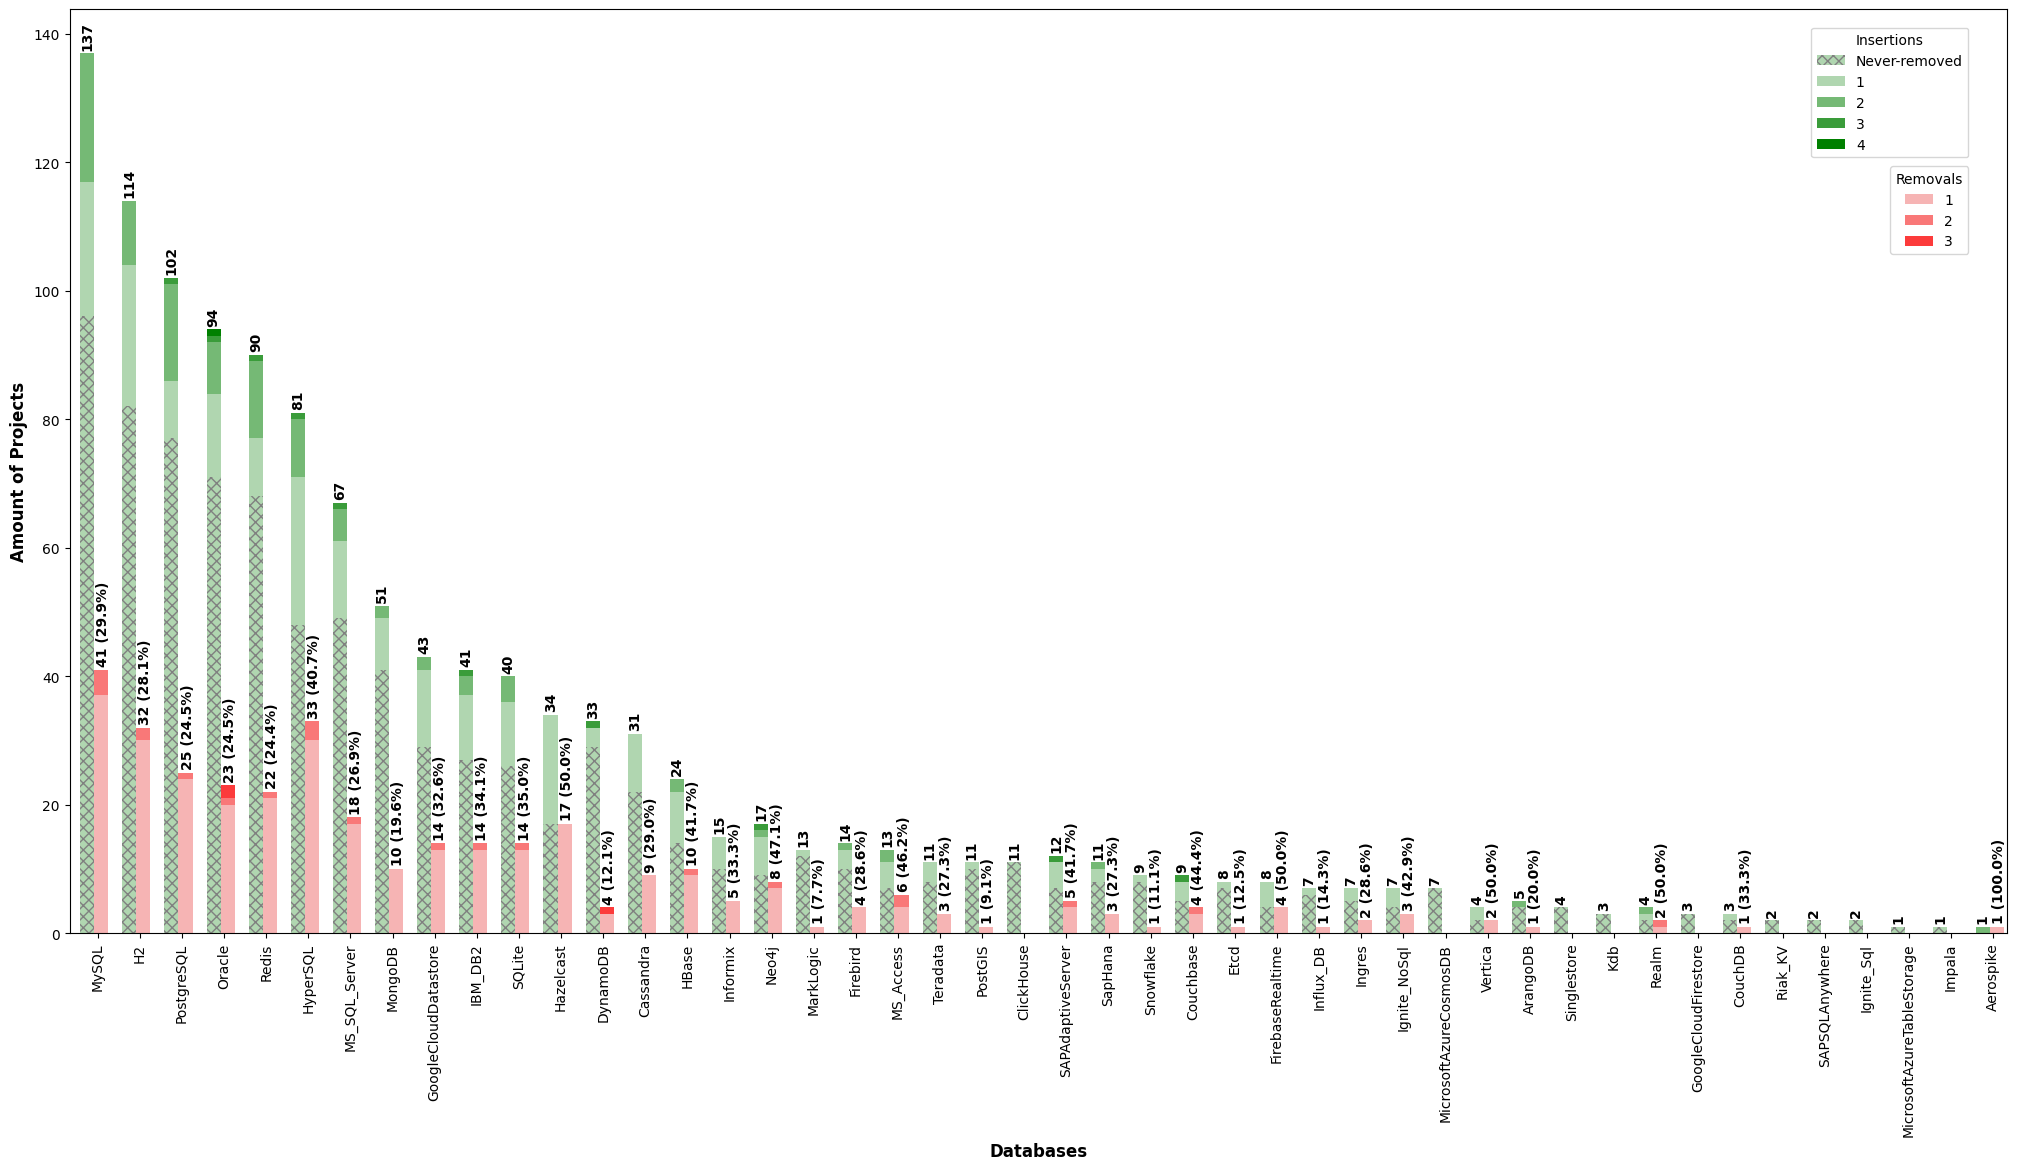

In [15]:
def plot_insertion_removal(dfall, df, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall['insertion'].columns) 
    n_ind = len(dfall['insertion'].index)
    axe = plt.subplot(111)

    visited = set()
    green_palette = sns.light_palette("green", n_colors=5)
    never_removed = green_palette[1]
    rest = green_palette[1:]
    palette = [never_removed] + rest
    sns.set_palette(palette)
    ax1 = axe = dfall['insertion'].plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)
    
    insertions = [0] * n_ind
    for c in ax1.containers:
        visited.add(id(c))
        for i, value in enumerate(c):
            if value.get_height() > 0:
                insertions[i] += int(value.get_height())
    for i, value in enumerate(ax1.containers[0]):
        value.set_edgecolor([0.5,0.5,0.5])
        value.set_hatch('xxx')    

    for i, value in enumerate(insertions):
        if not value:
            continue
        x = i - 0.08
        y = value + 1
        ax1.text(x, y, f'{value}', ha="center", fontsize=10, fontweight='bold', rotation=90)
        
    #ax1.bar_label(ax1.containers[-1], labels=insertions, label_type='edge', rotation=90)
    
    sns.set_palette(sns.light_palette("red", n_colors=5)[1:])
    ax2 = axe = dfall['removal'].plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)
    
    removals = [0] * n_ind
    for c in ax2.containers:
        if id(c) in visited:
            continue
        for i, value in enumerate(c):
            if value.get_height() > 0:
                removals[i] += int(value.get_height())
    for i, value in enumerate(removals):
        if not value:
            continue
        x = i + 0.3
        y = value + 1
        text = f'{value} ({value/insertions[i]:.1%})'
        ax1.text(x, y, text, ha="center", fontsize=10, fontweight='bold', rotation=90)           
    

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                #rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))                
        

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(dfall['removal'].index, rotation = 90)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], bbox_to_anchor=(0.98, 0.98), loc='upper right', borderaxespad=0., title="Insertions")
    l2 = axe.legend(h[n_col:], l[n_col:], bbox_to_anchor=(0.98, 0.83), loc='upper right', borderaxespad=0., title="Removals")
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe
sns.color_palette()
plt.figure(figsize=(25, 12))
plot_insertion_removal(op_dfs, df5t)
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')
plt.savefig(IMAGES_DIR+"/insertionsandremovals.pdf", format="pdf", bbox_inches="tight")

In [16]:
mysql_adoption = op_dfs["insertion"].sum(axis=1)['MySQL']
print(mysql_adoption)

137.0


In [17]:
mysql_removal = int(op_dfs["removal"].sum(axis=1)['MySQL'])
print("MySQL removal:", relative_var("rq3_mysql_removal", mysql_removal, mysql_adoption))

MySQL removal: 41 (29.9%)


In [18]:
second_insertion = int(op_dfs["insertion"]["2"]['MySQL'])
print("MySQL 2nd insertion:", relative_var("rq3_mysql_2nd_ins", second_insertion, mysql_adoption))

MySQL 2nd insertion: 20 (14.6%)


In [19]:
second_removal = int(op_dfs["removal"]["2"]['MySQL'])
print("MySQL 2nd removal:", relative_var("rq3_mysql_2nd_rem", second_removal, mysql_adoption))

MySQL 2nd removal: 4 (2.9%)


In [20]:
mysql_last_slice = mysql_adoption - mysql_removal + second_insertion - second_removal
print("MySQL last slice:", relative_var("rq3_mysql", mysql_last_slice, mysql_adoption))

MySQL last slice: 112.0 (81.8%)


In [21]:
mysql_extacly_only = (op_dfs["insertion"]["Never-removed"] + op_dfs["insertion"]["1"])['MySQL']
print("MySQL once:", relative_var("rq3_mysql_once", mysql_extacly_only, mysql_adoption))

MySQL once: 117.0 (85.4%)


In [22]:
never_removed = mysql_adoption - mysql_removal
print("MySQL never removed:", relative_var("rq3_mysql_never_removed", never_removed, mysql_adoption))

MySQL never removed: 96.0 (70.1%)


In [23]:
result = []
for key, value in op_dfs["insertion"][op_dfs["removal"].sum(axis=1) == 0]["Never-removed"].items():
    plural = 's' if value > 1 else ''
    result.append(f"{key} ({int(value)} project{plural})")
text = ', '.join(result[:-1]) + f", and {result[-1]}" 
print("DBMS with no removals:", var("rq3_no_removals", text))

DBMS with no removals: ClickHouse (11 projects), MicrosoftAzureCosmosDB (7 projects), Singlestore (4 projects), Kdb (3 projects), GoogleCloudFirestore (3 projects), Riak_KV (2 projects), SAPSQLAnywhere (2 projects), Ignite_Sql (2 projects), MicrosoftAzureTableStorage (1 project), and Impala (1 project)


In [24]:
assert op_dfs["insertion"]["4"]["Oracle"] == 1, "Paper: 'The removals happened for the majority of DBMSs we surveyed. Sometimes, more than once for the same project, with Oracle being removed 3 times and inserted 4 times in a single project, for instance.'"